In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data_2024 = pd.read_csv(r"fortune1000_2024.csv")
data_2024.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05


In [86]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

*Opis značajki*

Rank - rang na ljestvici <br />
Company - ime kompanije <br />
Ticker - dionički simbol, prazno ako je kompanija privatna <br />
Sector - sektor<br />
Industry - industrija (specificnije od sektora) <br />
Profitable - da/ne <br />
Founder_is_CEO - je li osnivač ujedno i CEO <br />
FemaleCEO - je li CEO žena <br />
Growth_in_Jobs - povecan broj zaposlenih <br />
Change_in_Rank - broj koji govori koliko se promijenio rang naspram prošle godine (+ za poboljšanje, - za pad u rangu) <br />
Gained_in_Rank - skok u rangu bool <br />
Dropped_in_Rank - pad u rangu bool <br />
Newcomer_to_the_Fortune500 - pridošlica u top 500 bool <br />
Global500 - spada li u top 500 SVJETSKIH kompanija <br />
Worlds_Most_Admired_Companies - spada li u firme s najboljom reputacijom da/ne <br />
Best_Companies_to_Work_For - spada li u firme s najzadovoljnijim zaposlenicima da/ne <br />
Number_of_employees  - broj zaposlenika <br />
MarketCap_March28_M  - tržišna kapitalizacija kompanije izraženu u milijunima (M) američkih dolara na datum 28. ožujka. <br />
Revenues_M - bruto prihod u milijunima <br />
RevenuePercentChange - postotna promjena prihoda kompanije u odnosu na prethodno razdoblje, obično u odnosu na prethodnu fiskalnu godinu <br />
Profits_M - neto dobit nakon što se odbiju svi troškovi od revenuea <br />
ProfitsPercentChange - postotna promjena profita kompanije u odnosu na prethodno razdoblje, obično u odnosu na prethodnu fiskalnu godinu <br />
Assets_M - ukupna imovina kompanije u milijunima (financijsko zdravlje) <br />
CEO - ime CEO-a <br />
Country - ime zemlje podrijetla <br />
HeadquartersCity - grad sjedišta <br />
HeadquartersState - savezna država sjedišta <br />
Website - url web stranice <br />
CompanyType - tip kompanije, Public/Private <br />
Footnote - napomena <br />
MarketCap_Updated_M - najnovija dostupna vrednost tržišne kapitalizacije <br />
Updated - datum kad su podaci ažurirani <br />


In [87]:
data_2024["CompanyType"].unique()

array(['Public', 'Private'], dtype=object)

In [88]:
print(data_2024["Sector"].unique())
print(data_2024["Industry"].unique())

['Retailing' 'Technology' 'Health Care' 'Financials' 'Energy'
 'Motor Vehicles & Parts' 'Food & Drug Stores' 'Telecommunications'
 'Food, Beverages & Tobacco' 'Transportation' 'Media' 'Household Products'
 'Aerospace & Defense' 'Wholesalers' 'Industrials' 'Apparel' 'Chemicals'
 'Hotels, Restaurants & Leisure' 'Engineering & Construction' 'Materials'
 'Business Services']
['General Merchandisers' 'Internet Services and Retailing'
 'Computers, Office Equipment' 'Health Care: Insurance and Managed Care'
 'Insurance: Property and Casualty (Stock)'
 'Health Care: Pharmacy and Other Services' 'Petroleum Refining'
 'Wholesalers: Health Care' 'Commercial Banks' 'Computer Software'
 'Motor Vehicles & Parts' 'Specialty Retailers: Other'
 'Food & Drug Stores' 'Diversified Financials' 'Telecommunications'
 'Insurance: Property and Casualty (Mutual)' 'Pharmaceuticals'
 'Food Production' 'Food Consumer Products'
 'Mail, Package, and Freight Delivery' 'Entertainment'
 'Household and Personal Products

In [89]:
data_2024_red = data_2024.copy()
data_2024_red = data_2024_red.drop(["Ticker", "CEO", "Country", "Website", "Footnote", "Updated"], axis=1)
data_2024_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Sector                         1000 non-null   object 
 3   Industry                       1000 non-null   object 
 4   Profitable                     1000 non-null   object 
 5   Founder_is_CEO                 1000 non-null   object 
 6   FemaleCEO                      1000 non-null   object 
 7   Growth_in_Jobs                 1000 non-null   object 
 8   Change_in_Rank                 1000 non-null   float64
 9   Gained_in_Rank                 1000 non-null   object 
 10  Dropped_in_Rank                1000 non-null   object 
 11  Newcomer_to_the_Fortune500     500 non-null    object 
 12  Global500                      1000 non-null   ob

*Provjera null vrijednosti*

In [90]:
#provjera null vrijednosti
data_2024_red.isnull().sum()

Rank                               0
Company                            0
Sector                             0
Industry                           0
Profitable                         0
Founder_is_CEO                     0
FemaleCEO                          0
Growth_in_Jobs                     0
Change_in_Rank                     0
Gained_in_Rank                     0
Dropped_in_Rank                    0
Newcomer_to_the_Fortune500       500
Global500                          0
Worlds_Most_Admired_Companies      0
Best_Companies_to_Work_For         0
Number_of_employees                0
MarketCap_March28_M               41
Revenues_M                         0
RevenuePercentChange               6
Profits_M                          2
ProfitsPercentChange             150
Assets_M                           0
HeadquartersCity                   0
HeadquartersState                  0
CompanyType                        0
MarketCap_Updated_M               37
dtype: int64

In [91]:
data_2024_new = data_2024_red.copy()


In [92]:
data_2024_new = data_2024_new.drop("Newcomer_to_the_Fortune500", axis=1)
data_2024_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Sector                         1000 non-null   object 
 3   Industry                       1000 non-null   object 
 4   Profitable                     1000 non-null   object 
 5   Founder_is_CEO                 1000 non-null   object 
 6   FemaleCEO                      1000 non-null   object 
 7   Growth_in_Jobs                 1000 non-null   object 
 8   Change_in_Rank                 1000 non-null   float64
 9   Gained_in_Rank                 1000 non-null   object 
 10  Dropped_in_Rank                1000 non-null   object 
 11  Global500                      1000 non-null   object 
 12  Worlds_Most_Admired_Companies  1000 non-null   ob

In [93]:
data_2024_new.loc[data_2024_new[['MarketCap_March28_M', 'MarketCap_Updated_M']].isna().any(axis=1), ['MarketCap_March28_M', 'MarketCap_Updated_M']]

# Stvaranje novog stupca MarketCap_M
data_2024_new['MarketCap_M'] = data_2024_new['MarketCap_March28_M'].fillna(data_2024_new['MarketCap_Updated_M'])
data_2024_new['MarketCap_M'].isnull().sum()



37

In [94]:
data_2024_new = data_2024_new.drop(['MarketCap_March28_M', 'MarketCap_Updated_M'], axis=1)

In [95]:
data_2024_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Sector                         1000 non-null   object 
 3   Industry                       1000 non-null   object 
 4   Profitable                     1000 non-null   object 
 5   Founder_is_CEO                 1000 non-null   object 
 6   FemaleCEO                      1000 non-null   object 
 7   Growth_in_Jobs                 1000 non-null   object 
 8   Change_in_Rank                 1000 non-null   float64
 9   Gained_in_Rank                 1000 non-null   object 
 10  Dropped_in_Rank                1000 non-null   object 
 11  Global500                      1000 non-null   object 
 12  Worlds_Most_Admired_Companies  1000 non-null   ob

In [96]:
data_2024_new['RevenuePercentChange'] = data_2024_new['RevenuePercentChange'].fillna(0)
data_2024_new['ProfitsPercentChange'] = data_2024_new['ProfitsPercentChange'].fillna(0)


In [97]:
data_2024_new.isnull().sum()

Rank                              0
Company                           0
Sector                            0
Industry                          0
Profitable                        0
Founder_is_CEO                    0
FemaleCEO                         0
Growth_in_Jobs                    0
Change_in_Rank                    0
Gained_in_Rank                    0
Dropped_in_Rank                   0
Global500                         0
Worlds_Most_Admired_Companies     0
Best_Companies_to_Work_For        0
Number_of_employees               0
Revenues_M                        0
RevenuePercentChange              0
Profits_M                         2
ProfitsPercentChange              0
Assets_M                          0
HeadquartersCity                  0
HeadquartersState                 0
CompanyType                       0
MarketCap_M                      37
dtype: int64

In [98]:
data_2024_new = data_2024_new.dropna(subset=['Profits_M'])
data_2024_new.isnull().sum()

Rank                              0
Company                           0
Sector                            0
Industry                          0
Profitable                        0
Founder_is_CEO                    0
FemaleCEO                         0
Growth_in_Jobs                    0
Change_in_Rank                    0
Gained_in_Rank                    0
Dropped_in_Rank                   0
Global500                         0
Worlds_Most_Admired_Companies     0
Best_Companies_to_Work_For        0
Number_of_employees               0
Revenues_M                        0
RevenuePercentChange              0
Profits_M                         0
ProfitsPercentChange              0
Assets_M                          0
HeadquartersCity                  0
HeadquartersState                 0
CompanyType                       0
MarketCap_M                      37
dtype: int64

In [99]:
data_2024_new = data_2024_new.dropna(subset=['MarketCap_M'])
data_2024_new.isnull().sum()

Rank                             0
Company                          0
Sector                           0
Industry                         0
Profitable                       0
Founder_is_CEO                   0
FemaleCEO                        0
Growth_in_Jobs                   0
Change_in_Rank                   0
Gained_in_Rank                   0
Dropped_in_Rank                  0
Global500                        0
Worlds_Most_Admired_Companies    0
Best_Companies_to_Work_For       0
Number_of_employees              0
Revenues_M                       0
RevenuePercentChange             0
Profits_M                        0
ProfitsPercentChange             0
Assets_M                         0
HeadquartersCity                 0
HeadquartersState                0
CompanyType                      0
MarketCap_M                      0
dtype: int64

In [100]:
data_2024_new.shape

(961, 24)

*Vizualizacije*

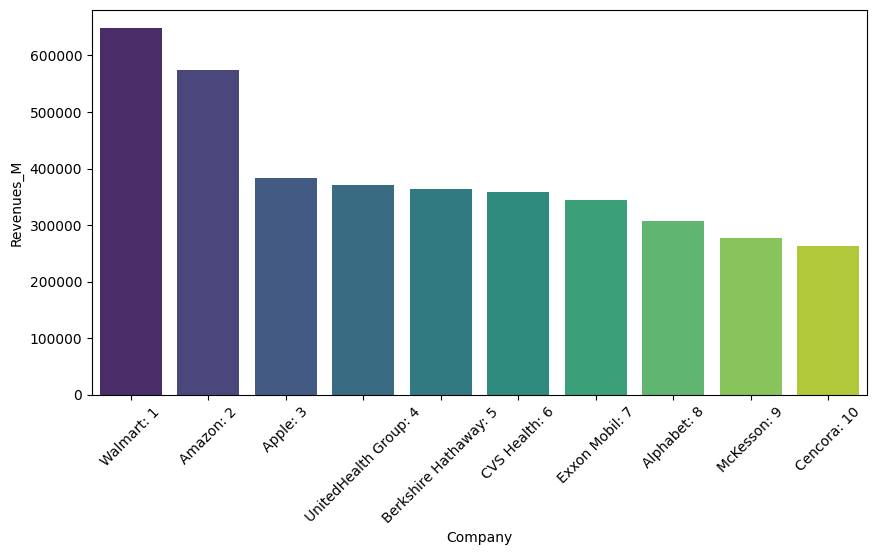

In [101]:
#prikaži prvih 10
plt.figure(figsize=(10, 5))
sns.barplot(x='Company', y='Revenues_M', data=data_2024_new.head(10), palette='viridis')

# Dodavanje prilagođenih oznaka na x-os s kombinacijom naziva kompanije i ranka
labels = [f"{row['Company']}: {row['Rank']}" for _, row in data_2024_new.head(10).iterrows()]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

In [102]:
columns_encode = []
for col in data_2024_new.columns:
    if (data_2024_new[col].dtype != "float64" and data_2024_new[col].dtype != "int64"):
        columns_encode.append(col)

columns_encode

['Company',
 'Sector',
 'Industry',
 'Profitable',
 'Founder_is_CEO',
 'FemaleCEO',
 'Growth_in_Jobs',
 'Gained_in_Rank',
 'Dropped_in_Rank',
 'Global500',
 'Worlds_Most_Admired_Companies',
 'Best_Companies_to_Work_For',
 'HeadquartersCity',
 'HeadquartersState',
 'CompanyType']

*Enkodiranje kategoričkih varijabli*

In [103]:
from sklearn.preprocessing import LabelEncoder

# Lista stupaca koje želite kodirati
columns_to_encode = ['Company',
 'Sector',
 'Industry',
 'Profitable',
 'Founder_is_CEO',
 'FemaleCEO',
 'Growth_in_Jobs',
 'Gained_in_Rank',
 'Dropped_in_Rank',
 'Global500',
 'Worlds_Most_Admired_Companies',
 'Best_Companies_to_Work_For',
 'HeadquartersCity',
 'HeadquartersState',
 'CompanyType']

# Kreiraj instance LabelEncoder-a
le = LabelEncoder()

# Iteriraj kroz svaki stupac u listi i primijeni LabelEncoder
for col in columns_to_encode:
    data_2024_new[col] = le.fit_transform(data_2024_new[col])


*Feature selection*

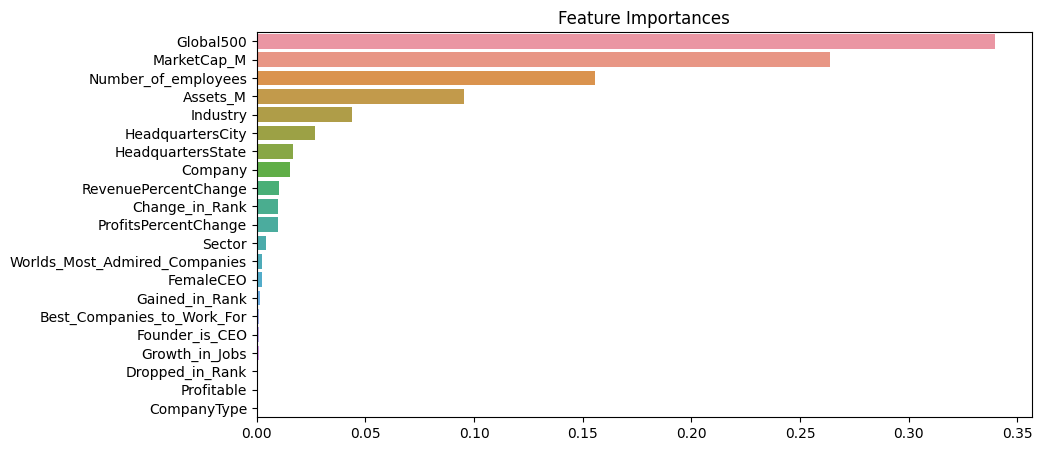

In [104]:
from sklearn.ensemble import RandomForestRegressor

# X i y
X = data_2024_new.drop(columns=['Rank', 'Revenues_M', 'Profits_M'])
y = data_2024_new['Revenues_M']

# Treniranje Random Forest modela
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Važnost značajki
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Prikaz rezultata
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.show()


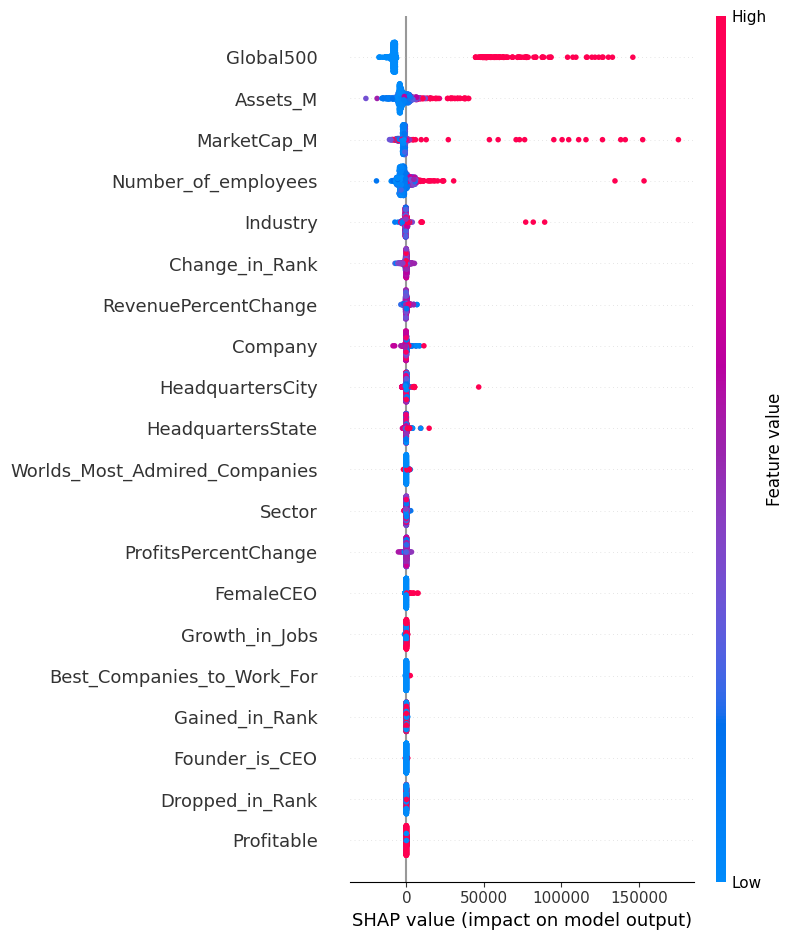

In [105]:
import shap

#treniranje modela
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

#explaineri
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#vizualizacija
shap.summary_plot(shap_values, X)


In [106]:
# from sklearn.cluster import KMeans

# # Pretpostavimo da su 'Revenue_M', 'Profits_M' i 'Assets_M' relevantne značajke
# X = data_2024_new[['Revenues_M']]

# # Primjena K-means klasteriranja
# kmeans = KMeans(n_clusters=3, random_state=42)
# data_2024_new['Cluster'] = kmeans.fit_predict(X)

# # Analiza klastera
# print(data_2024_new.groupby('Cluster')['Sector'].value_counts())


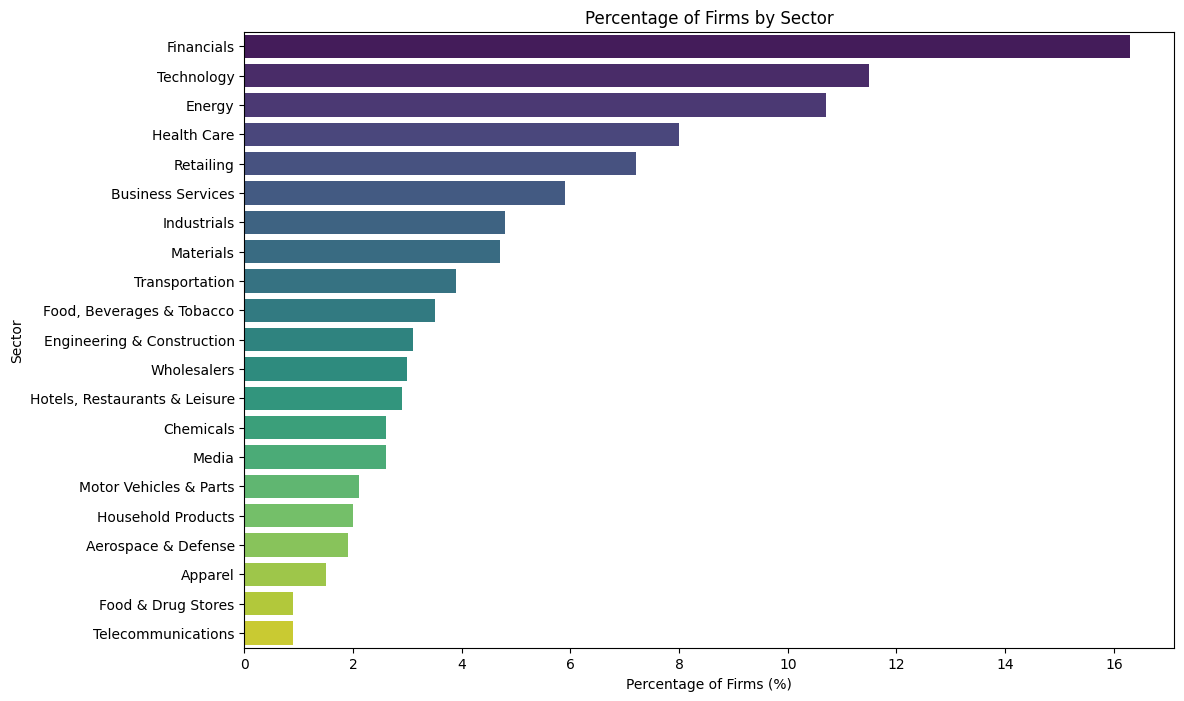

In [110]:
# Brojanje broja firmi u svakom sektoru i izračunavanje postotka
sector_counts = data_2024_red['Sector'].value_counts(normalize=True).reset_index()
sector_counts.columns = ['Sector', 'Percentage']

# Pretvaranje u postotke (ako želite da se prikazuju u formatiranju kao postotak)
sector_counts['Percentage'] *= 100

# Prikazivanje bar charta
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Sector', data=sector_counts, palette='viridis')

# Dodavanje naslova i oznaka osi
plt.title('Percentage of Firms by Sector')
plt.xlabel('Percentage of Firms (%)')
plt.ylabel('Sector')

# Prikaz grafikona
plt.show()


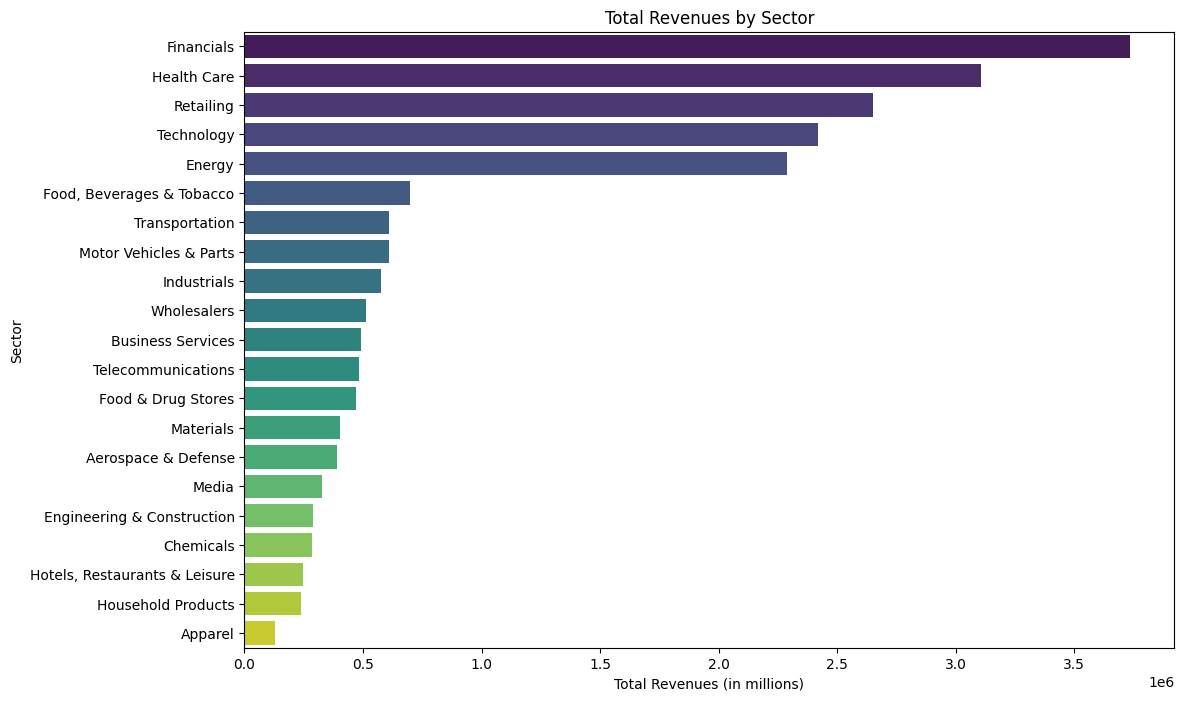

In [107]:
# Agregiranje prihoda po sektoru
sector_revenue = data_2024_red.groupby('Sector')['Revenues_M'].sum().reset_index()

# Sortiranje po prihodu (opcionalno)
sector_revenue = sector_revenue.sort_values(by='Revenues_M', ascending=False)


# Postavke za vizualizaciju
plt.figure(figsize=(12, 8))

# Bar chart
sns.barplot(x='Revenues_M', y='Sector', data=sector_revenue, palette='viridis')

# Dodavanje naslova i oznaka osi
plt.title('Total Revenues by Sector')
plt.xlabel('Total Revenues (in millions)')
plt.ylabel('Sector')

# Prikaz grafikona
plt.show()


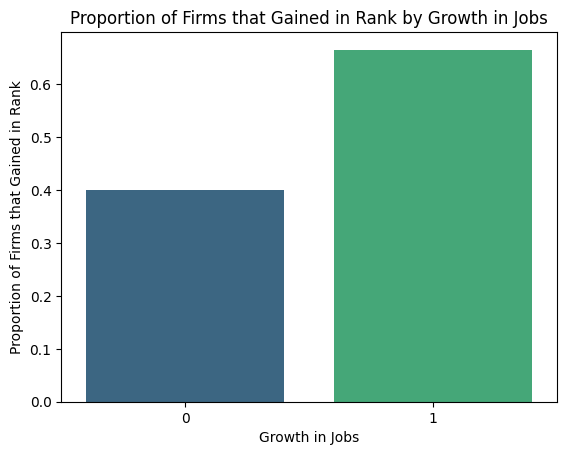

In [108]:
# Grupiranje podataka prema 'Growth_in_Jobs' i računjanje prosjeka 'Gained_in_Rank'
grouped_data = data_2024_new.groupby('Growth_in_Jobs')['Gained_in_Rank'].mean().reset_index()

# Prikazivanje bar charta
sns.barplot(x='Growth_in_Jobs', y='Gained_in_Rank', data=grouped_data, palette="viridis")
plt.xlabel('Growth in Jobs')
plt.ylabel('Proportion of Firms that Gained in Rank')
plt.title('Proportion of Firms that Gained in Rank by Growth in Jobs')
plt.show()
